<a href="https://colab.research.google.com/github/jiewenTsai/ninja/blob/main/2025W30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 0721

### Problem

你想測試一下 Doran (2023) 文章中所說的 _OLS as a Unifying Framework_ 這一小節。


### Solution

**Theory.** 一個一般的解線性方程式的公式如右 X'Xβ = X'y, 因此我們可以得到 β 的估計值為 $\bf \hat \beta=(X'X)^{-1}X'y$. 而 Doran (2023) 文章中提到，很多文章都是用 $\bf (X'X)^{-1}$.
然而更快速更穩定的方法不是用 $\bf (X'X)$ 的 invert 而是應該去找 $\bf (X'X)$ 的分解，$\bf (X'X)=LL'$，其中 L 是 Cholesky factor 的下三角。


### See Also

- Doran, H. (2023). A collection of numerical recipes useful for building scalable psychometric applications. Journal of Educational and Behavioral Statistics, 48(1), 37-69.


In [17]:
X = matrix(rnorm(300), nrow=100)
B = rnorm(3)
y = X %*% B + rnorm(100)
cat('True B: ', B)

True B:  1.302446 1.219099 2.64538

In [18]:
## X'X
t(X) %*% X

108.376385,-8.716593,-6.680255
-8.716593,121.026511,-6.408469
-6.680255,-6.408469,83.483773


In [22]:
## find cholesky factor
L = t(X) %*% X |> chol() |> t()
L %*% t(L)

108.376385,-8.716593,-6.680255
-8.716593,121.026511,-6.408469
-6.680255,-6.408469,83.483773


In [27]:
## Estimated B
solve(t(X) %*% X) %*% t(X) %*% y

1.339048
1.107174
2.587583


In [24]:
# 正確的兩步求解
XTy = t(X) %*% y
z = forwardsolve(L, XTy)      # 解 L*z = X^T*y
B_hat = backsolve(t(L), z)    # 解 L^T*β = z

print(B_hat)

         [,1]
[1,] 1.339048
[2,] 1.107174
[3,] 2.587583


In [26]:
system("sudo apt install r-cran-microbenchmark")

In [28]:
library(microbenchmark)

In [85]:
bench <- microbenchmark(
  inverse = solve(t(X) %*% X) %*% t(X) %*% y,
  cholesky = {
    L = t(X) %*% X |> chol() |> t()
    XTy = t(X) %*% y
    z = forwardsolve(L, XTy)      # 解 L*z = X^T*y
    B_hat = backsolve(t(L), z)    # 解 L^T*β = z
  },
  rcpp = solve_two_steps(X,y),
  times = 100
)

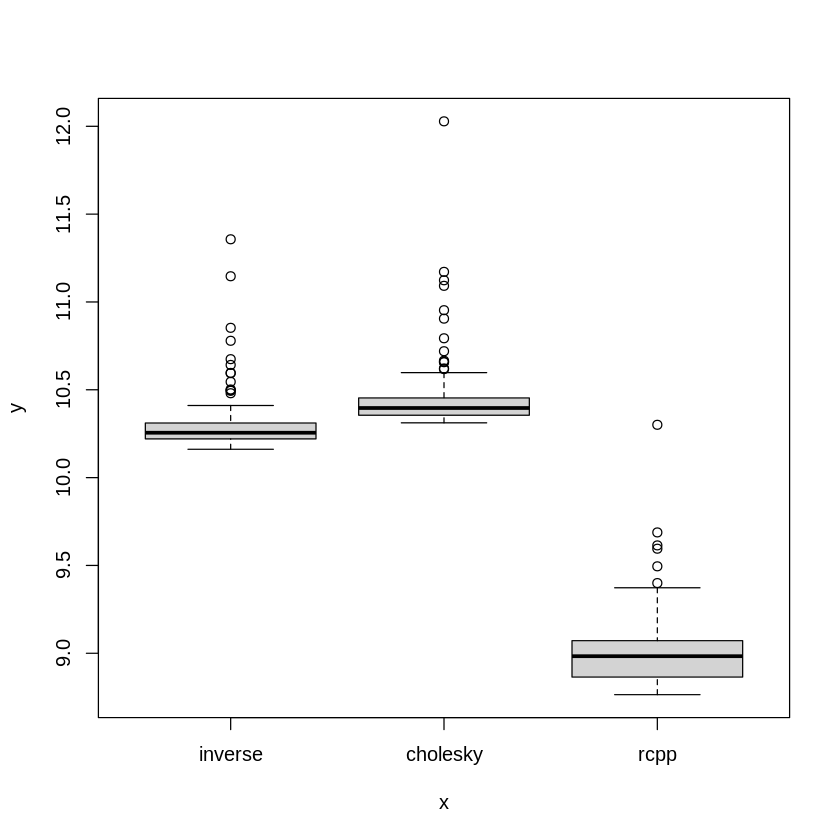

In [89]:
plot(bench$expr, log(bench$time))

**Step 2. (用 Rcpp 寫)**


In [32]:
system("sudo apt install r-cran-rcpparmadillo")

In [49]:
library(Rcpp)
library(RcppArmadillo)

In [75]:
rcpp_chol <- '
#include <RcppArmadillo.h>
// [[Rcpp::depends(RcppArmadillo)]]

using namespace arma;

// [[Rcpp::export]]
arma::mat find_chol(arma::mat X){
  // find cholesky factor
  arma::mat XTX = X.t() * X;
  arma::mat L = chol(XTX);

  return L.t();
}

// [[Rcpp::export]]
arma::mat solve_two_steps(arma::mat X, arma::mat y){
  arma::mat XTy = X.t() * y;
  arma::mat L = find_chol(X);
  // 兩步求解
  arma::mat z = solve(trimatl(L), XTy);
  arma::mat beta = solve(trimatu(L.t()), z);

  return beta;
}

'

In [76]:
sourceCpp(code = rcpp_chol)

In [77]:
find_chol(X)

10.4103979,0.0000000,0.000000
-0.8372968,10.9692955,0.000000
-0.6416906,-0.6331997,9.092363


In [78]:
solve_two_steps(X,y)

1.339048
1.107174
2.587583


## 0722


### Problem



### Solution


### Discussion



### See Also



